In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [2]:
TRAIN_PATH = "../input/train.csv"
TEST_PATH = "../input/test.csv"
USER_PATH = "../input/user_x_anime.csv"

In [3]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
user = pd.read_csv(USER_PATH)

In [15]:
user.groupby(by="anime_id")["watched_episodes"].nunique()

anime_id
1        28
5         5
6        27
7        26
8        39
         ..
47398     4
47402     2
47614     2
47616     2
48456     2
Name: watched_episodes, Length: 12421, dtype: int64

In [10]:
test.head()

,MAL_ID,Name,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),273145,1174,4143,208333,1935,770,57964
1,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,558913,12944,29113,343492,25465,13925,146918
2,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,94683,587,4300,46165,5121,5378,33719
3,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,13224,18,642,7314,766,1108,3394
4,15,Eyeshield 21,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",Gallop,Manga,23 min. per ep.,PG-13 - Teens 13 or older,148259,2066,13907,78349,14228,11573,30202


In [9]:
test.iloc[:,-6:].sum(axis=1)

0       274319
1       571857
2        95270
3        13242
4       150325
         ...  
7416       492
7417     18233
7418       859
7419     13160
7420     10889
Length: 7421, dtype: int64

In [6]:
train.sort_values(by="Score",ascending=False).iloc[:20]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
4769,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",Winter 2021,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,MAPPA,Manga,23 min. per ep.,R - 17+ (violence & profanity),733260,44862,566239,553,6658,2090,157720
4585,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity),1073626,40985,54607,906824,5533,3099,103563
2231,9969,Gintama',9.08,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",Gintama Season 2,銀魂',TV,51,"Apr 4, 2011 to Mar 26, 2012",Spring 2011,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Unknown,Sunrise,Manga,24 min. per ep.,PG-13 - Teens 13 or older,365579,6567,26492,190008,10615,7084,131380
279,820,Ginga Eiyuu Densetsu,9.07,"Military, Sci-Fi, Space, Drama",Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,"Jan 8, 1988 to Mar 17, 1997",Unknown,"Kitty Films, K-Factory",Sentai Filmworks,"Artland, Magic Bus",Novel,26 min. per ep.,R - 17+ (violence & profanity),230168,13834,25968,52583,14911,5950,130756
2636,15417,Gintama': Enchousen,9.04,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama:Enchousen,銀魂' 延長戦,TV,13,"Oct 4, 2012 to Mar 28, 2013",Fall 2012,"TV Tokyo, Aniplex, Dentsu, Shueisha, Miracle Bus",Unknown,Sunrise,Manga,24 min. per ep.,PG-13 - Teens 13 or older,222819,2586,7800,143353,2753,2012,66901
2629,15335,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,8.96,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",Unknown,劇場版 銀魂 完結篇 万事屋よ永遠なれ,Movie,1,"Jul 6, 2013",Unknown,"TV Tokyo, Aniplex, Dentsu, Bandai, Warner Bros...",Unknown,Sunrise,Manga,1 hr. 50 min.,PG-13 - Teens 13 or older,171119,2184,3687,122632,1246,1198,42356
318,918,Gintama,8.96,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama,銀魂,TV,201,"Apr 4, 2006 to Mar 25, 2010",Spring 2006,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Audi...","Sentai Filmworks, Crunchyroll",Sunrise,Manga,24 min. per ep.,PG-13 - Teens 13 or older,754607,48247,149543,230260,87145,39531,248128
4419,37491,Gintama.: Shirogane no Tamashii-hen - Kouhan-sen,8.86,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",Gintama.:Silver Soul Arc - Second Half War,銀魂. 銀ノ魂篇 後半戦,TV,14,"Jul 9, 2018 to Oct 8, 2018",Summer 2018,"TV Tokyo, Aniplex, Dentsu, Shueisha",Unknown,Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older,114591,938,6282,67276,1748,1080,38205
56,199,Sen to Chihiro no Kamikakushi,8.83,"Adventure, Supernatural, Drama",Spirited Away,千と千尋の神隠し,Movie,1,"Jul 20, 2001",Unknown,Toho,"Walt Disney Studios, GKIDS",Studio Ghibli,Original,2 hr. 5 min.,PG - Children,1245727,25610,14444,1124666,3124,1437,102056
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),1251960,61971,105808,718161,71513,26678,329800


<AxesSubplot:>

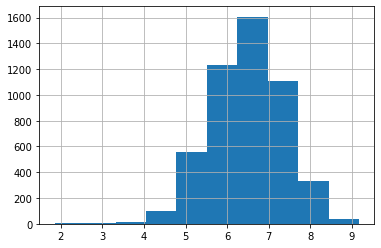

In [20]:
train["Score"].hist()

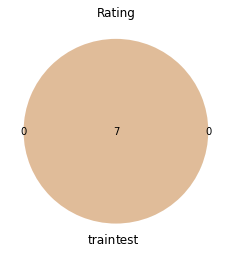

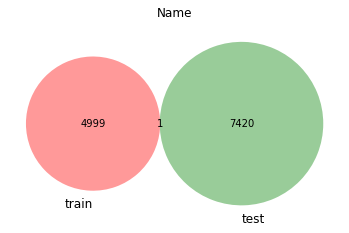

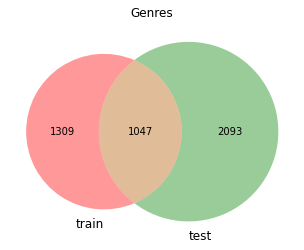

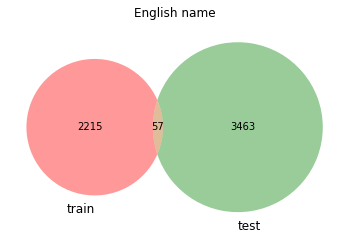

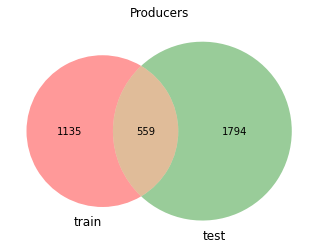

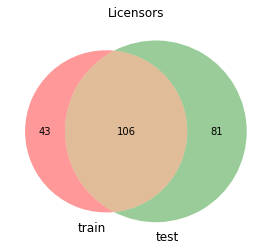

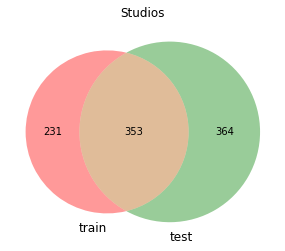

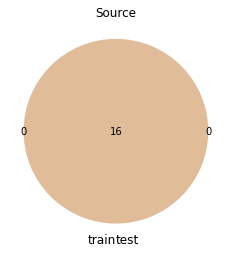

In [11]:
# cat_cols
cat_cols = ["Rating","Name", "Genres", "English name", "Producers", "Licensors", "Studios", "Source"]
for c in cat_cols:
    venn2(subsets=(set(train[c].unique()), set(test[c].unique())), set_labels=('train', 'test'))
    plt.title(c)
    plt.show()

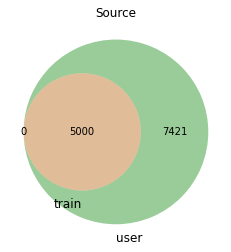

In [33]:
venn2(subsets=(set(train["MAL_ID"].unique()), set(user["anime_id"].unique())), set_labels=('train', 'user'))
plt.title(c)
plt.show()

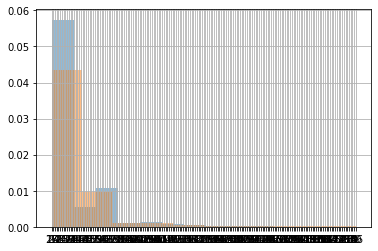

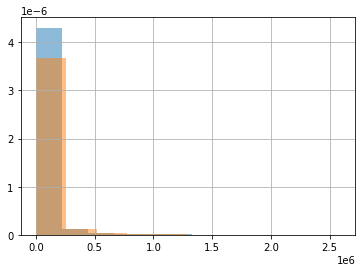

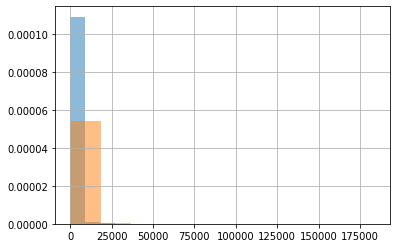

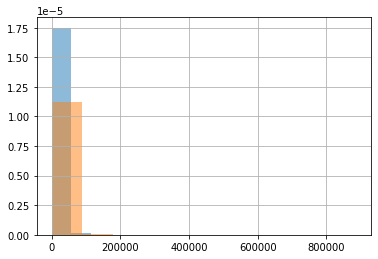

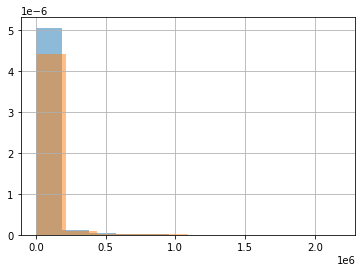

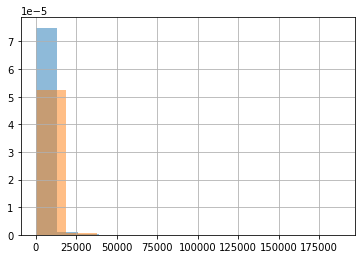

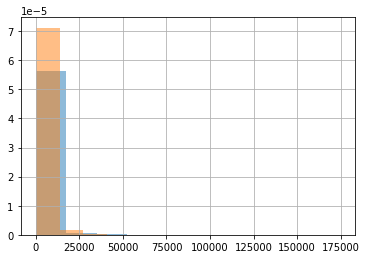

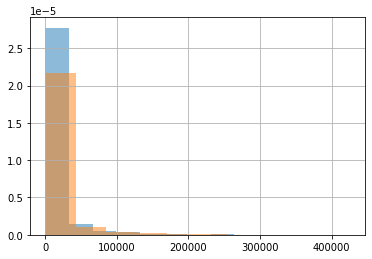

In [34]:
numerical_cols = ["Episodes", "Members", "Favorites","Watching","Completed","On-Hold","Dropped","Plan to Watch"]
for c in numerical_cols:
    train[c].hist(density=True, alpha=0.5)
    test[c].hist(density=True, alpha=0.5)
    plt.show()

In [37]:
train["Genres"]

0         Action, Adventure, Comedy, Drama, Sci-Fi, Space
1            Comedy, Drama, Josei, Romance, Slice of Life
2                 Action, Comedy, Sports, School, Shounen
3                                 Action, Shounen, Sports
4       Action, Military, Sci-Fi, Adventure, Horror, S...
                              ...                        
4995                                                Music
4996                                     Fantasy, Shounen
4997                                        Music, Comedy
4998                                               Comedy
4999                                Slice of Life, Comedy
Name: Genres, Length: 5000, dtype: object

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(train["Genres"])

In [44]:
X.todense()

matrix([[1, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [52]:
a = pd.DataFrame()
a["text"] = ["text, book","text","text","text","book, e"]

In [53]:
a["text"]

0    text, book
1          text
2          text
3          text
4       book, e
Name: text, dtype: object

In [54]:
cv = CountVectorizer()
x = cv.fit_transform(a["text"])

In [56]:
x.todense()

matrix([[1, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 0]])

In [7]:
train["Aired"].str.split("to")

0        [Apr 3, 1998 ,  Apr 24, 1999]
1       [Apr 15, 2005 ,  Sep 27, 2005]
2       [Oct 10, 2001 ,  Mar 23, 2005]
3        [Oct 6, 2004 ,  Dec 15, 2004]
4                       [Jul 16, 1988]
                     ...              
4995                     [Dec 7, 2020]
4996                     [Jan 5, 2021]
4997                [Feb 5, 2021 ,  ?]
4998                [Jan 8, 2021 ,  ?]
4999                    [Feb 11, 2021]
Name: Aired, Length: 5000, dtype: object

In [29]:
def air_to_today(day):
    try:
        day = day.split("to")[0]
        day = pd.to_datetime(day)
        d = pd.to_datetime('2021-08-01') - day
        return d.days
    except:
        return np.nan

In [30]:
train["Aired"].map(air_to_today)

0        8521.0
1        5952.0
2        7235.0
3        6143.0
4       12069.0
         ...   
4995      237.0
4996      208.0
4997      177.0
4998      205.0
4999      171.0
Name: Aired, Length: 5000, dtype: float64

In [31]:
train["Duration"]

0       24 min. per ep.
1       23 min. per ep.
2       22 min. per ep.
3       25 min. per ep.
4          2 hr. 4 min.
             ...       
4995             4 min.
4996            23 min.
4997             3 min.
4998             1 min.
4999            10 min.
Name: Duration, Length: 5000, dtype: object

In [40]:
import re
a = re.match(r"[0-9]{1,7} min.", "24 min. per ep.")

In [55]:
min_match = []
for i in train["Duration"]:
    min_match_ = re.match(r"[0-9]{1,7} min.", i)
    if min_match_ is not None:
        min_match.append(float(min_match_.group(0).replace(" min.","")))
    else:
        min_match.append(0)

In [56]:
min_match

[24.0,
 23.0,
 22.0,
 25.0,
 0,
 24.0,
 30.0,
 24.0,
 0,
 22.0,
 23.0,
 24.0,
 23.0,
 23.0,
 24.0,
 24.0,
 24.0,
 24.0,
 25.0,
 52.0,
 30.0,
 24.0,
 0,
 30.0,
 24.0,
 24.0,
 24.0,
 21.0,
 30.0,
 25.0,
 23.0,
 12.0,
 24.0,
 24.0,
 23.0,
 24.0,
 23.0,
 24.0,
 24.0,
 24.0,
 23.0,
 24.0,
 24.0,
 24.0,
 23.0,
 20.0,
 26.0,
 23.0,
 23.0,
 23.0,
 25.0,
 28.0,
 24.0,
 25.0,
 24.0,
 23.0,
 0,
 24.0,
 25.0,
 24.0,
 0,
 29.0,
 28.0,
 48.0,
 0,
 25.0,
 25.0,
 25.0,
 24.0,
 23.0,
 25.0,
 23.0,
 25.0,
 25.0,
 23.0,
 23.0,
 25.0,
 23.0,
 26.0,
 25.0,
 30.0,
 24.0,
 0,
 25.0,
 29.0,
 24.0,
 15.0,
 24.0,
 24.0,
 20.0,
 23.0,
 22.0,
 25.0,
 24.0,
 26.0,
 24.0,
 25.0,
 0,
 24.0,
 24.0,
 24.0,
 24.0,
 0,
 0,
 23.0,
 25.0,
 22.0,
 25.0,
 24.0,
 24.0,
 23.0,
 24.0,
 11.0,
 24.0,
 23.0,
 23.0,
 23.0,
 24.0,
 13.0,
 24.0,
 24.0,
 14.0,
 25.0,
 25.0,
 55.0,
 30.0,
 0,
 24.0,
 23.0,
 25.0,
 25.0,
 0,
 24.0,
 33.0,
 28.0,
 23.0,
 23.0,
 25.0,
 37.0,
 37.0,
 25.0,
 24.0,
 24.0,
 23.0,
 30.0,
 26.0,
 25.0,
 30.0,


In [45]:
a = re.match(r"[0-9]{1,7} min.", "a")

In [53]:
min_match_.group(0)

'24 min.'